<h1 style="text-align:  center;">Введение в анализ данных</h1>

<h1 style="text-align:  center;">LAB4</h1>

In [70]:
import pandas as pd
cancer_df = pd.read_csv("3cancer.csv")
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [71]:
cancer_df.head(10)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


<h1 style="text-align:  center;">Подготовка данных</h1>

Оценим уникальные значения полей

In [73]:
for column in cancer_df.columns:
    print('Уникальные значения поля', column, ': ', cancer_df[column].unique())

Уникальные значения поля id :  [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  

Удалим пустые данные или непдходящего типа. Аналогично поступим с дубликатами. И востановим индиксацию данных.

In [75]:
cancer_df['bare_nucleoli'] = cancer_df['bare_nucleoli'].replace({'?': None})
cancer_df = cancer_df.dropna()
cancer_df['bare_nucleoli'] = cancer_df['bare_nucleoli'].astype('int64')

cancer_df = cancer_df.drop_duplicates(subset=['id'])
cancer_df = cancer_df.drop_duplicates(
    subset=['clump_thickness', "size_uniformity", "shape_uniformity", "marginal_adhesion", "epithelial_size",
            "bare_nucleoli", "bland_chromatin", "normal_nucleoli", "mitoses", "class"])

cancer_df.reset_index(drop=True, inplace=True)

<h1 style="text-align:  center;">Нормализация данных</h1>

Будем проводить нормализацию без поля id, так как он не несет смысловой нагрузки для анализа.

In [76]:
old_cancer_df = cancer_df
cancer_df = cancer_df.drop(columns = ['id'])

Масштабирование данных будем производить с помощью класса MinMaxScaler() из модуля preprocessing библиотеки для машинного обучения sklearn, в результате мы получим значения параметров в диапазоне от 0 до 1.

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # создаём объект класса scaler
scaler.fit(cancer_df) # обучаем стандартизатор
df_sc = scaler.transform(cancer_df) # преобразуем набор данных

In [78]:
df_sc = pd.DataFrame(df_sc, columns = cancer_df.columns)

Построим график распределения признаков

<AxesSubplot:ylabel='Density'>

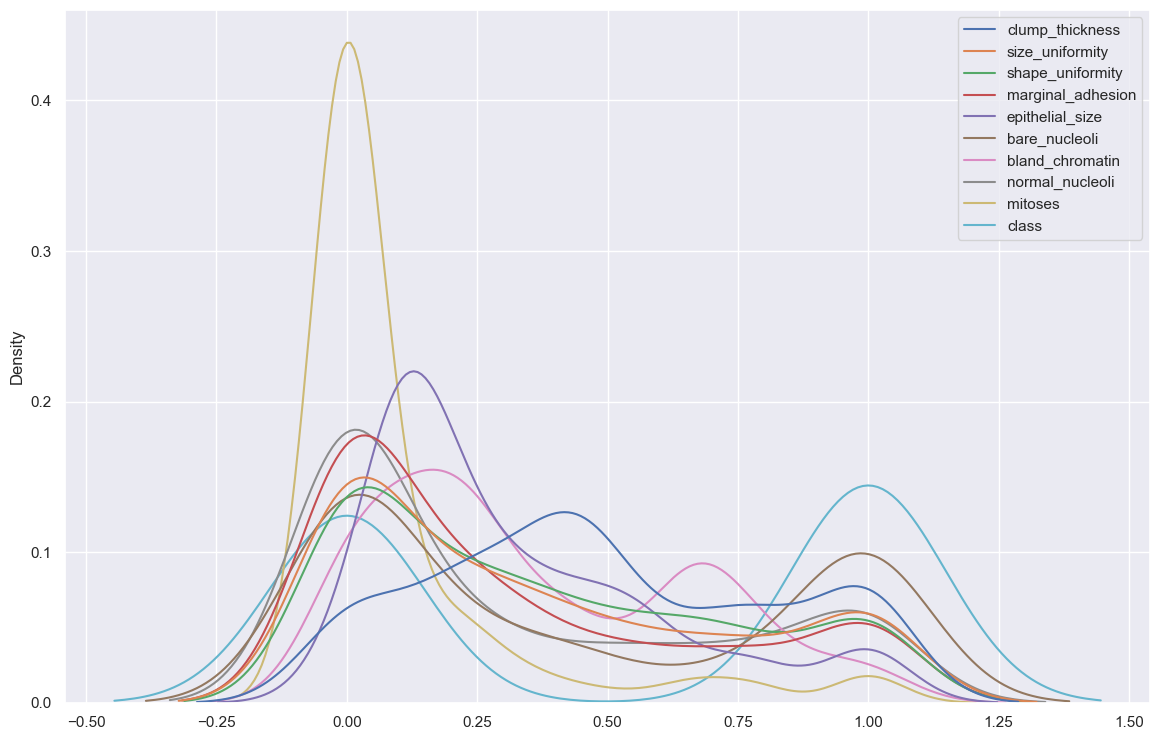

In [79]:
import seaborn as sns

sns.set(rc={'figure.figsize':(14,9)})
sns.kdeplot(data=df_sc)

<h1 style="text-align:  center;">Классификация данных</h1>
<h2 style="text-align:  center;">Целевой признак</h2>

Целевым признаком датасета является поле *class* – стадия рака, т.к. основная задача врачебных наблюдений в том, чтобы предсказать зарание появление болезни.

Отделили матрицу *объект-признаков X* и *вектор целевой переменной y* с помощью метода drop() библиотеки Pandas, это необходимо для проведения корректного обучения

In [80]:
y = df_sc['class']
X = df_sc.drop(['class'], axis=1)

In [81]:
X.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [82]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
423    0.0
424    0.0
425    0.0
426    1.0
427    1.0
Name: class, Length: 428, dtype: float64

<h1 style="text-align:  center;">Разбиение набора данных на тренировочной и тестовый датасеты с помощью train_test_split</h1>

Импорт модуля для разбиения датасета на тренировочной и тестовый

Размер тренировочной выборки 258 записей, что составляет 60,2% от общего количества записей 428, и 170 тестовая выборка.

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.602, random_state=42)

Проверка разбиения

In [84]:
import numpy as np
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [117 140]
Количество строк в y_test по классам: [81 90]


<h1 style="text-align:  center;">Разработка предсказательных моделей качественного отклика</h1>

<h2 style="text-align:  center;">Метод k- ближайших соседей</h2>

Для классификации методом К-ближайших соседей воспользуемся моделью, предоставляемой модулем KNeighborsClassifier из библиотеки Scikit-learn. Суть метода в отнесении объекта к какому-то классу на основании расстояния от него до центров кластеров, определённых моделью в процессе обучения. 

Обучение проводем на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной). Параметр n_neighbors = 2, который обозначает количество кластеров алгоритма K-ближайших соседей. Значение было получено в прошлой лабораторной работе при кластеризации агломеративно иерархическим методом.

In [85]:
# Импорт модели К-ближайших
from sklearn.neighbors import KNeighborsClassifier


# Создание объекта модели
KNeighbors_model = KNeighborsClassifier(n_neighbors = 2)

# Обучение модели
KNeighbors_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

Сделали предсказание для тестовой части данных (X_test)

In [86]:
KNeighbors_pred = KNeighbors_model.predict(X_test)

H:\ProgramData\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<h2 style="text-align:  center;">Логистическая регрессия</h2>

Суть метода в отнесении объекта к какому-то классу на основании его положения относительно плоскости, которая разбивает пространство объектов на кластеры (в нашем случае на два кластера). Положение плоскости в пространстве объектов определяется моделью в ходе обучения. Для классификации методом Логической регрессии воспользовались моделью, предоставляемой модулем LogisticRegression из библиотеки Scikit-learn.

Обучение проводили на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной).

In [87]:
# Импорт модели Логической регрессии
from sklearn.linear_model import LogisticRegression


# Создание объекта модели
LogisticReg_model = LogisticRegression()

# Обучение модели
LogisticReg_model.fit(X_train, y_train)

LogisticRegression()

Сделали предсказание для тестовой части данных (X_test)

In [88]:
# Делаем предсказание
LogisticReg_pred = LogisticReg_model.predict(X_test)

<h2 style="text-align:  center;">Случайный лес</h2>

Суть метода состоит в использовании нескольких решающих деревьев. Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается. Для классификации методом Случайный лес воспользовались моделью, предоставляемой модулем RandomForestClassifier из библиотеки Scikit-learn.

Обучение проводили на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной).

In [89]:
# Импорт модели Случайный лес
from sklearn.ensemble import RandomForestClassifier


# Создание объекта модели
RandForest_model = RandomForestClassifier()

# Обучение модели
RandForest_model.fit(X_train, y_train)

RandomForestClassifier()

Сделали предсказание для тестовой части данных (X_test)

In [90]:
# Делаем предсказание
RandForest_pred = RandForest_model.predict(X_test)

<h1 style="text-align:  center;">Оценка ошибок классификации</h1>

<h2 style="text-align:  center;">Метрика "Accuracy" (Доля правильных ответов)</h2>

Метрика показывает процент значений, которые модель угадала правильно при проверке на тестовых данных.

In [91]:
# Импорт метода для метрики "Accuracy"
from sklearn.metrics import accuracy_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "Accuracy" (Доля правильных ответов) для моделей:')
for pred in model_list:
  score = accuracy_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оценка метрики "Accuracy" (Доля правильных ответов) для моделей:
	> "К-ближайших"          : 0.9357
	> "Логическая регрессия" : 0.9591
	> "Случайный лес"        : 0.9649


Самый лучший результат у модели Случайный лес точность предсказаний 96,4%, Логическая регрессия показала резульат на 0,5% ниже,  а К-ближайших показал 93,5%.

<h2 style="text-align:  center;">Метрика "Balanced accuracy" (Cбалансированная точность)</h2>

Показывает среднюю точность для классов, используется для оценки несбалансированных классов.

In [92]:
# Импорт метода для метрики "Balanced accuracy"
from sklearn.metrics import balanced_accuracy_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "Balanced accuracy" (Cбалансированная точность) для моделей:')
for pred in model_list:
  score = balanced_accuracy_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оценка метрики "Balanced accuracy" (Cбалансированная точность) для моделей:
	> "К-ближайших"          : 0.9364
	> "Логическая регрессия" : 0.9593
	> "Случайный лес"        : 0.9648


Результат аналогичный предыдущему

<h2 style="text-align:  center;">Метрика "Precision" (Точность)</h2>

In [93]:
# Импорт метода для метрики "Precision"
from sklearn.metrics import precision_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "Precision" (Точность) для моделей:')
for pred in model_list:
  score = precision_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оценка метрики "Precision" (Точность) для моделей:
	> "К-ближайших"          : 0.954
	> "Логическая регрессия" : 0.9663
	> "Случайный лес"        : 0.9667


Логическая регрессия и Случайный лес показывают равный резултат отличающийся толко в тысячных и с отличием в 1% К-ближайших

<h2 style="text-align:  center;">Метрика "Recall" (Полнота)</h2>

In [94]:
# Импорт метода для метрики "Recall"
from sklearn.metrics import recall_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "Recall" (Полнота) для моделей:')
for pred in model_list:
  score = recall_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оценка метрики "Recall" (Полнота) для моделей:
	> "К-ближайших"          : 0.9222
	> "Логическая регрессия" : 0.9556
	> "Случайный лес"        : 0.9667


<h2 style="text-align:  center;">Метрика 'F1 score' (F-мера, Сбалансированная Точность/Полнота)</h2>

In [95]:
# Импорт метода для метрики "F1 score"
from sklearn.metrics import f1_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "F1 score" (F-мера) для моделей:')
for pred in model_list:
  score = f1_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оценка метрики "F1 score" (F-мера) для моделей:
	> "К-ближайших"          : 0.9379
	> "Логическая регрессия" : 0.9609
	> "Случайный лес"        : 0.9667


<h1 style="text-align:  center;">Матрица неточностей</h1>

Данная матрица дает количественную оценку предсказаний данных моделью, показывая сколько положительных и отрицательных значений угадано верно и ошибочно.

На основании данной матрицы производятся расчеты всех ранее полученных метрик, а на основании группы таких матриц, полученных при разных пороговых значениях, строится ROC-кривая.

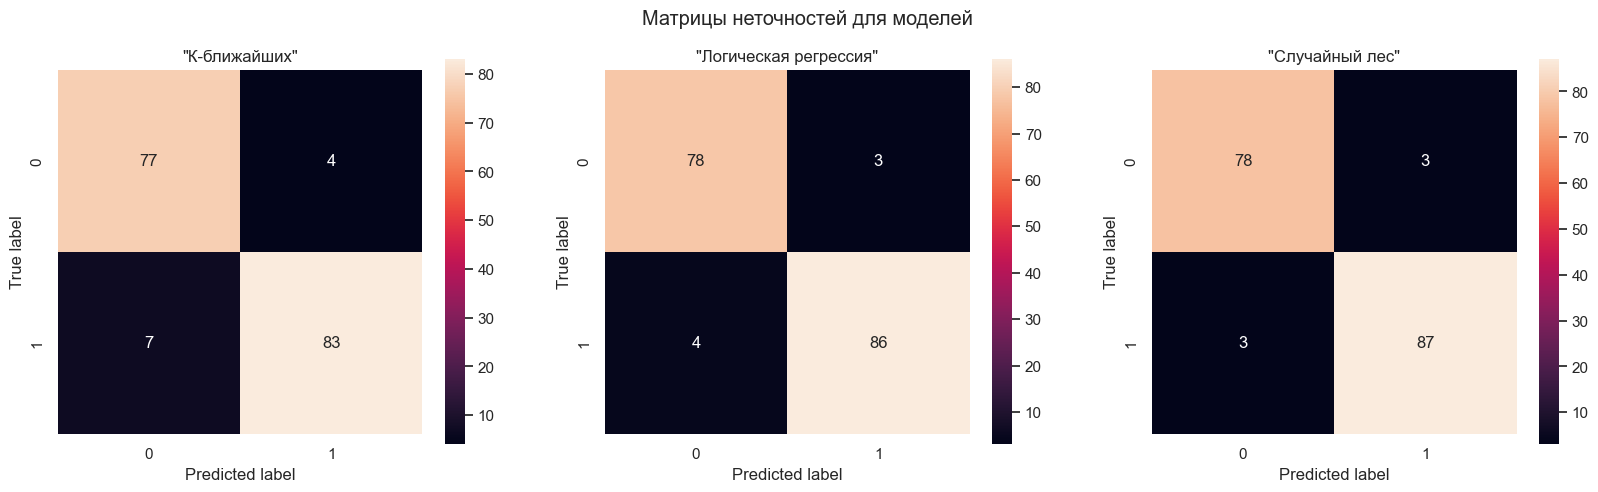

In [96]:
# Импорт модуля для построения Матрицы неточностей
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay    # 2 вариант построения
from matplotlib import pyplot as plt
from seaborn import heatmap


model_list = [['"К-ближайших"', KNeighbors_pred],
              ['"Логическая регрессия"', LogisticReg_pred],
              ['"Случайный лес"', RandForest_pred]]

fig, axis = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Матрицы неточностей для моделей')

for idx, pred in enumerate(model_list):
  heatmap(confusion_matrix(y_test, pred[1]), annot=True, fmt=".0f", square=True, ax=axis[idx])
  axis[idx].set_title(pred[0])
  axis[idx].set_xlabel('Predicted label')
  axis[idx].set_ylabel('True label')

  # ConfusionMatrixDisplay.from_predictions(y_test, pred[1], ax=axis[idx])    # 2 вариант построения

<h1 style="text-align:  center;">Графики ROC-кривой</h1>

График ROC-кривой позволяет оценить при каком пороговом значении модель будет давать лучший результат при классификации данных.

Метрика AUC — это площадь под кривой ROC.

Общее правило гласит, чтобы определить оптимальную точку на кривой ROC, нужно максимизировать разницу (True Positive Rate (TPR) - False Positive Rate (FPR)), которая на графике представлена вертикальным расстоянием между полученной ROC-кривой и диагональной линией из точки (0, 0) в (1, 1).

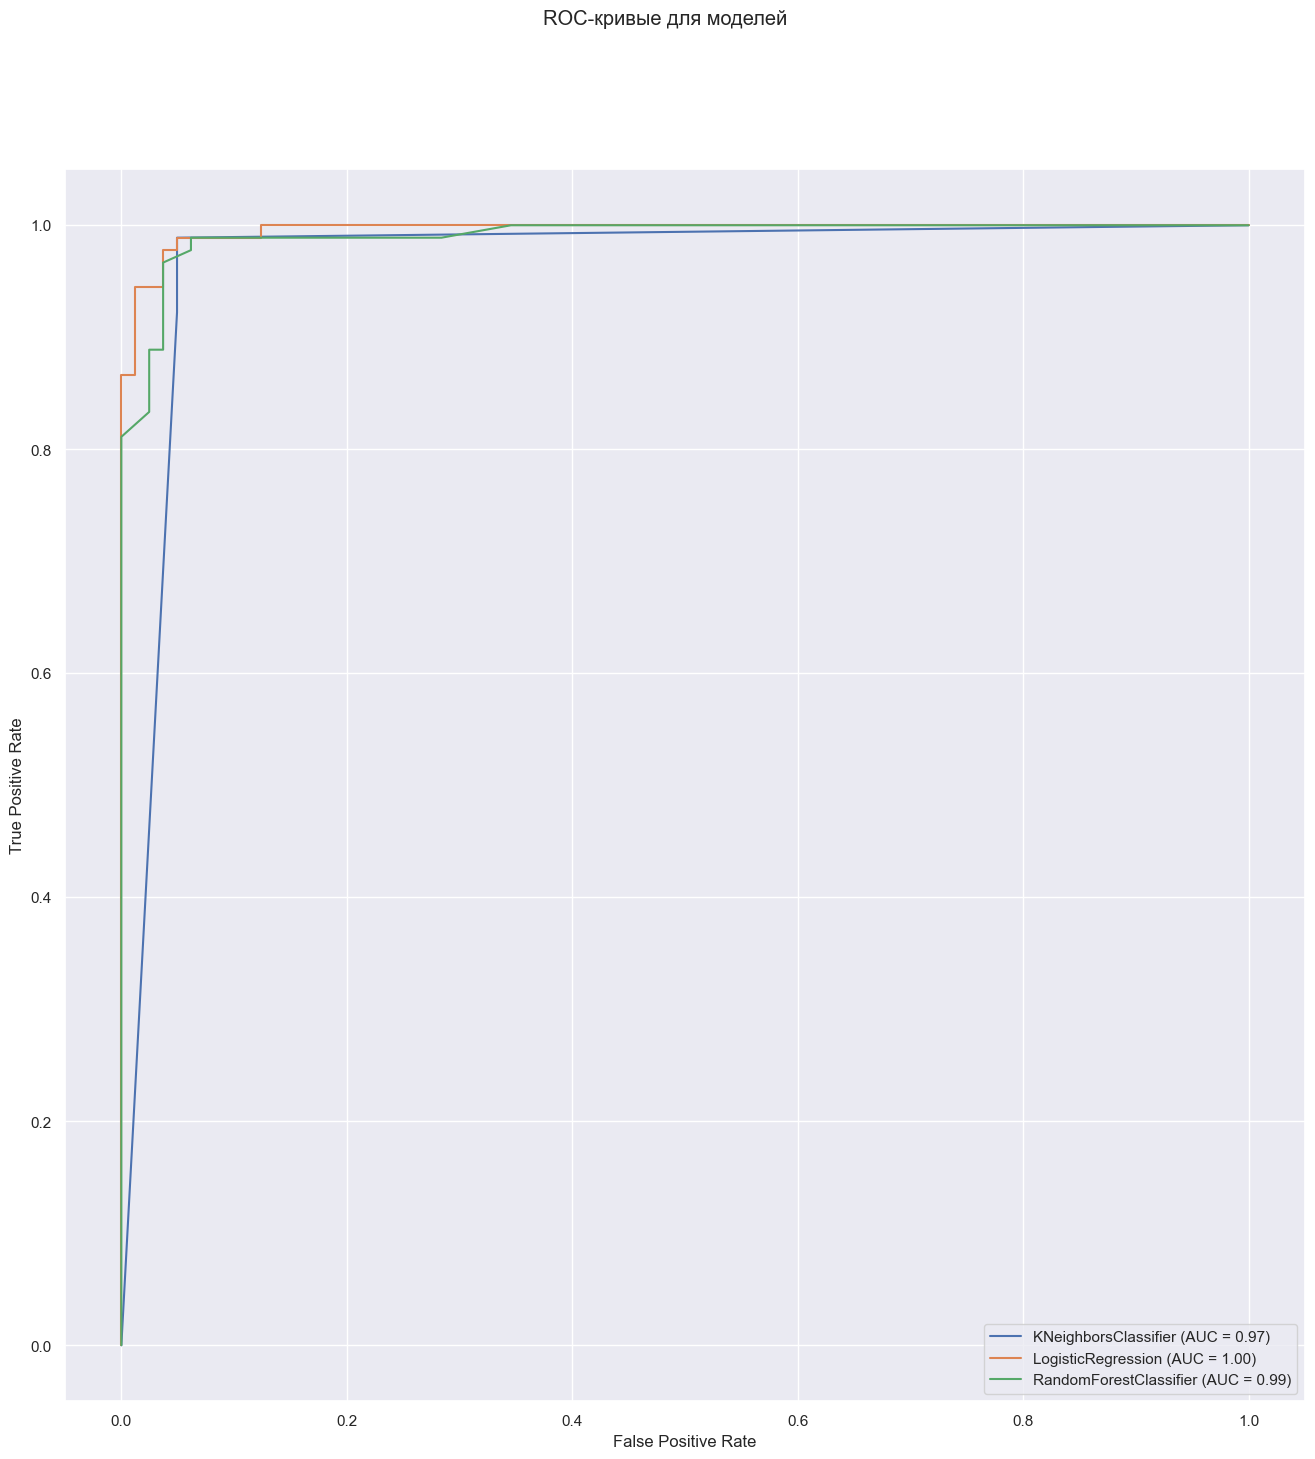

In [97]:
# Импорт модуля для построения 
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt

model_list = [['"К-ближайших"', KNeighbors_model],
              ['"Логическая регрессия"', LogisticReg_model],
              ['"Случайный лес"', RandForest_model]]

fig, axis = plt.subplots(figsize=(16, 16))
fig.suptitle('ROC-кривые для моделей')

for idx, model in enumerate(model_list):
  RocCurveDisplay.from_estimator(model[1], X_test, y_test, ax=axis)
  axis.set_xlabel('False Positive Rate')
  axis.set_ylabel('True Positive Rate')

Оценка AUC показывает неплохие результаты для всех моделей, но самый лучший у моделей Логической регрессии и Случайного леса.